# Récupérer les données Velib (JCDecaux) et les visualiser

La société [JCDecaux](http://www.jcdecaux.com/fr/pour-nos-partenaires/velos-en-libre-service) met à disoposition les données Velib pour toutes les villes dont il gère le service (Besançon, Nantes, Lyon, ...). Les données sont accessibles en temps réel via une API assez simple : [JCDecaux Developer](https://developer.jcdecaux.com/#/home). Le module [manydataapi](http://www.xavierdupre.fr/app/manydataapi/helpsphinx/index.html) inclut désormais la classe [DataCollectJCDecaux](http://www.xavierdupre.fr/app/manydataapi/helpsphinx/manydataapi/velib/data_jcdecaux.html?highlight=velib#velib.data_jcdecaux.DataCollectJCDecaux) qui permet de récupérer ces données et d'effectuer quelques traitements simples.

Tout d'abord, il est nécessaire d'obtenir une clé en vous enregistrant sur le site de JCDecaux : [Votre compte développeur](https://developer.jcdecaux.com/#/signup). Le code suivant permet de récupérer des données pendant 5 minutes :

In [1]:
%matplotlib inline

In [2]:
from manydataapi.velib import DataCollectJCDecaux
import os
import datetime
folder = os.path.abspath("data_velib")
if not os.path.exists(folder):
    os.makedirs(folder)

In [3]:
import keyring
key = keyring.get_password("velib", "manydataapi,key")

In [4]:
stop = datetime.datetime.now() + datetime.timedelta(minutes=2)
stop

datetime.datetime(2018, 5, 5, 11, 50, 17, 504796)

In [5]:
DataCollectJCDecaux.run_collection (key, contract="Besancon",
            folder_file=os.path.join(folder, "besancon"),
            stop_datetime=stop, delayms=20000)  # remplace par None pour récupérer les données sans s'arrêter

DataCollectJCDecaux.collecting_data: nb=1 2018-05-05 11:48:18.129813 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=2 2018-05-05 11:48:38.905538 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=3 2018-05-05 11:48:58.832916 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=4 2018-05-05 11:49:18.538977 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=5 2018-05-05 11:49:38.648084 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=6 2018-05-05 11:49:58.737056 delay=0:00:20


On liste les fichiers dans le répertoire :

In [6]:
os.listdir(folder)

['besancon.2018-05-05_11-39-13.751513.txt',
 'besancon.2018-05-05_11-40-15.447794.txt',
 'besancon.2018-05-05_11-43-29.305119.txt',
 'besancon.2018-05-05_11-43-34.476269.txt',
 'besancon.2018-05-05_11-43-47.222698.txt',
 'besancon.2018-05-05_11-44-07.721770.txt',
 'besancon.2018-05-05_11-44-27.834866.txt',
 'besancon.2018-05-05_11-44-47.899099.txt',
 'besancon.2018-05-05_11-45-08.021366.txt',
 'besancon.2018-05-05_11-45-27.689934.txt',
 'besancon.2018-05-05_11-47-06.942535.txt',
 'besancon.2018-05-05_11-47-27.459651.txt',
 'besancon.2018-05-05_11-47-47.584375.txt',
 'besancon.2018-05-05_11-48-07.647889.txt',
 'besancon.2018-05-05_11-48-18.129813.txt',
 'besancon.2018-05-05_11-48-38.905538.txt',
 'besancon.2018-05-05_11-48-58.832916.txt',
 'besancon.2018-05-05_11-49-18.538977.txt',
 'besancon.2018-05-05_11-49-38.648084.txt',
 'besancon.2018-05-05_11-49-58.737056.txt']

On construit un DataFrame à partir de ces données :

In [7]:
df = DataCollectJCDecaux.to_df(folder, "^besancon.*[.]txt")
df.to_csv(os.path.join(folder, "resume_besancon.txt"), sep="\t", index=False, encoding="utf8")
df.to_excel(os.path.join(folder, "resume_besancon.xlsx"), index=False)
df[["name","lng", "lat", "collect_date", "available_bike_stands", "available_bikes", "file"]].head()

name       lng        lat               collect_date  \
0      16 - BEAUREGARD  6.032438  47.245026 2018-05-05 11:39:13.900474   
1  30 - XAVIER MARMIER  6.006690  47.241256 2018-05-05 11:39:13.900474   
2  02 - SQUARE BOUCHOT  6.022070  47.242990 2018-05-05 11:39:13.900474   
3          26 - BERSOT  6.029520  47.238861 2018-05-05 11:39:13.900474   
4        14 - JACOBINS  6.033465  47.234142 2018-05-05 11:39:13.900474   

   available_bike_stands  available_bikes  \
0                      5                6   
1                     11                1   
2                      2                8   
3                      1                9   
4                      9                1   

                                      file  
0  besancon.2018-05-05_11-39-13.751513.txt  
1  besancon.2018-05-05_11-39-13.751513.txt  
2  besancon.2018-05-05_11-39-13.751513.txt  
3  besancon.2018-05-05_11-39-13.751513.txt  
4  besancon.2018-05-05_11-39-13.751513.txt

On visualise les données pour une date donnée :

Text(0.5,1,'Besançon - 2018-05-05 11-39-13.751513 - 30 stations')

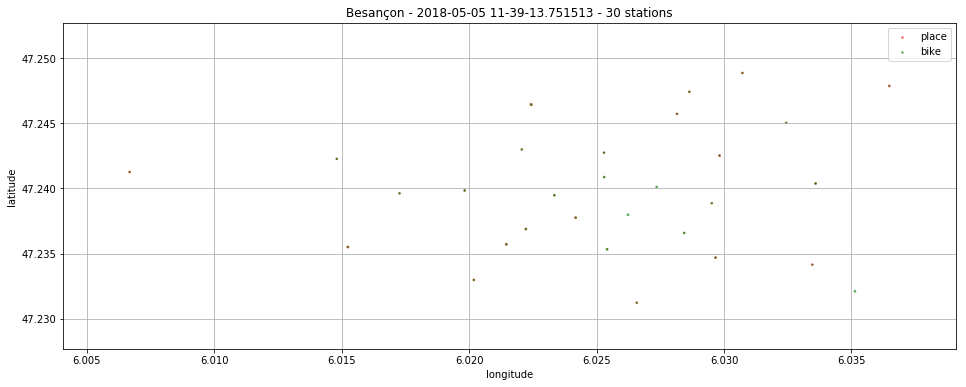

In [8]:
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataCollectJCDecaux.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                    .replace(".txt","").replace("_", " "), len(subset)))

On crée une petite animation avec les données velib :

In [9]:
import matplotlib.animation as animation
anim = DataCollectJCDecaux.animation(df, interval = 100, figsize=(16,6))

In [10]:
from IPython.display import HTML

In [11]:
HTML(anim.to_jshtml())

On essaye autrement.


[MoviePy] Building file anim1.gif with imageio


 98%|████████████████████████████████████████████████████████████████████████████████  | 40/41 [00:03<00:00, 11.72it/s]


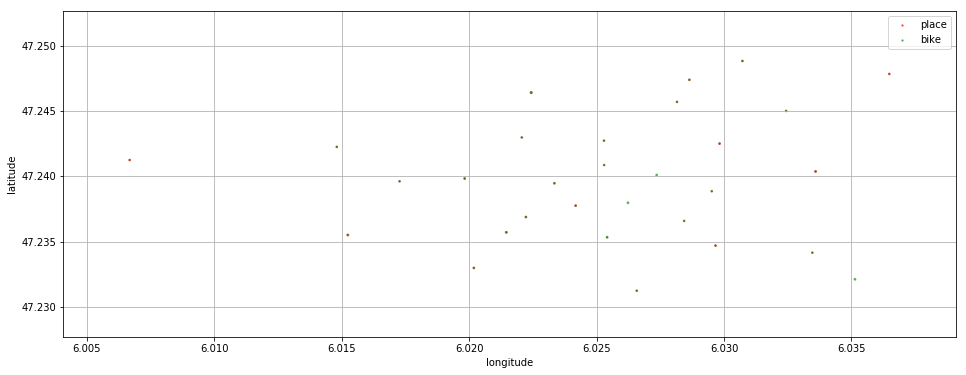

In [12]:
anim = DataCollectJCDecaux.animation(df[-1000:], interval = 100, figsize=(16,6), module="moviepy")
anim.write_gif("anim1.gif", fps=20);

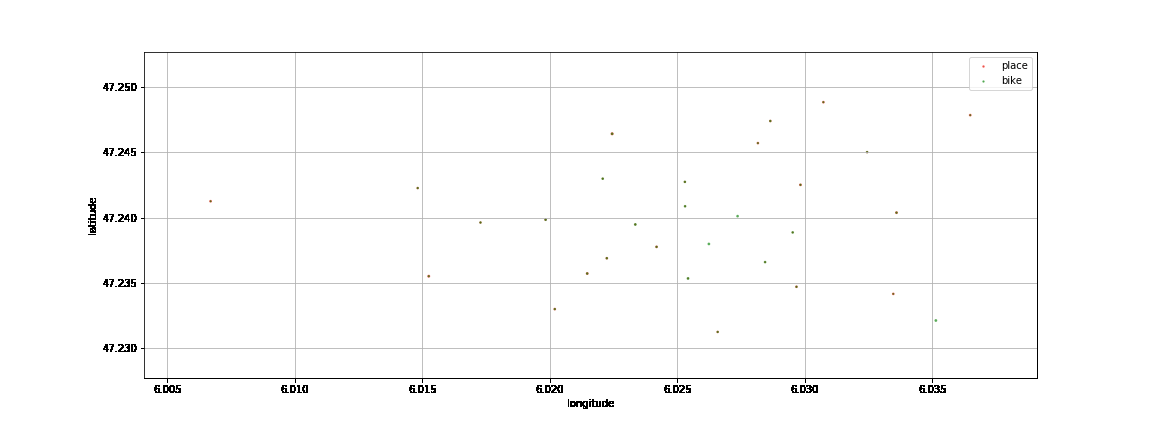

In [13]:
from IPython.display import Image
Image('anim1.gif')

Ca ne bouge pas trop. Sur deux minutes, c'est plutôt attendu. On essaye sur plus de données.

In [14]:
from pyensae import download_data
import pandas
download_data('besancon.df.txt.zip', website = 'xdtd')  

['.\\besancon.df.txt']

In [15]:
df = pandas.read_csv("besancon.df.txt", sep="\t", encoding="utf8")
df.shape

(22650, 15)


[MoviePy] Building file anim2.gif with imageio


 98%|█████████▊| 40/41 [00:03<00:00, 12.55it/s]


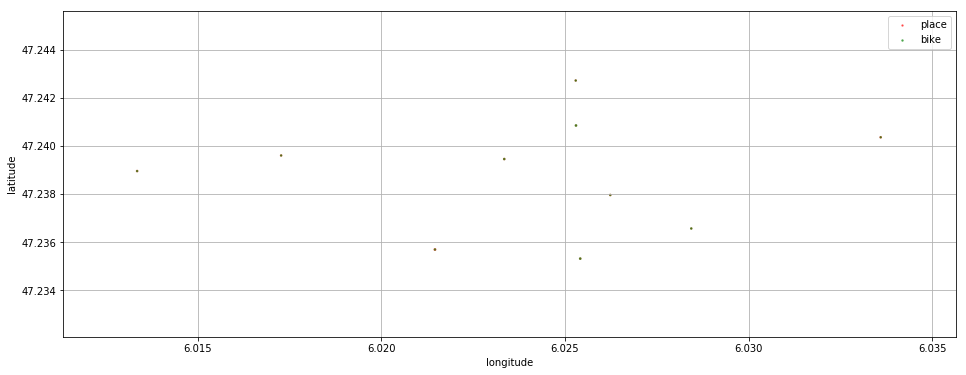

In [16]:
from manydataapi.velib import DataCollectJCDecaux
anim = DataCollectJCDecaux.animation(df[-1000:], interval=100, figsize=(16,6), module="moviepy")
anim.write_gif("anim2.gif", fps=20);

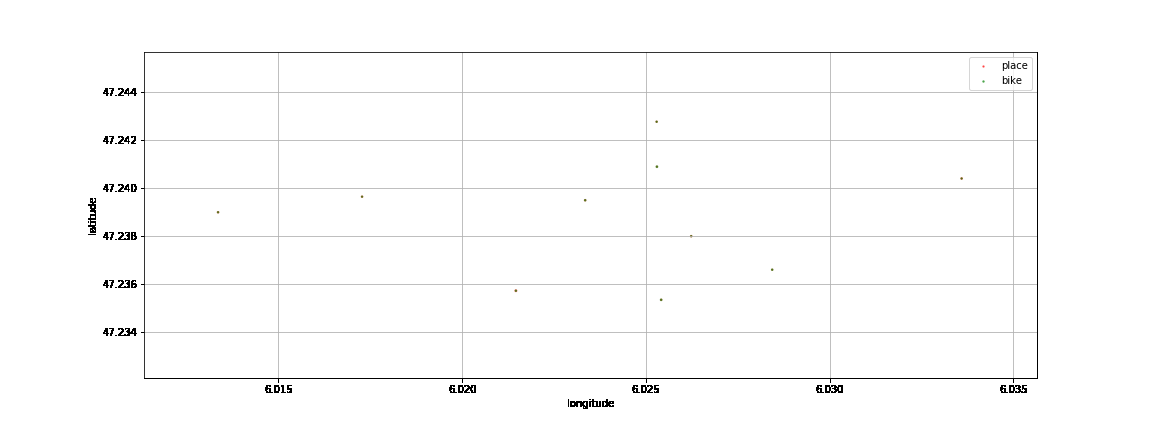

In [17]:
from IPython.display import Image
Image('anim2.gif')

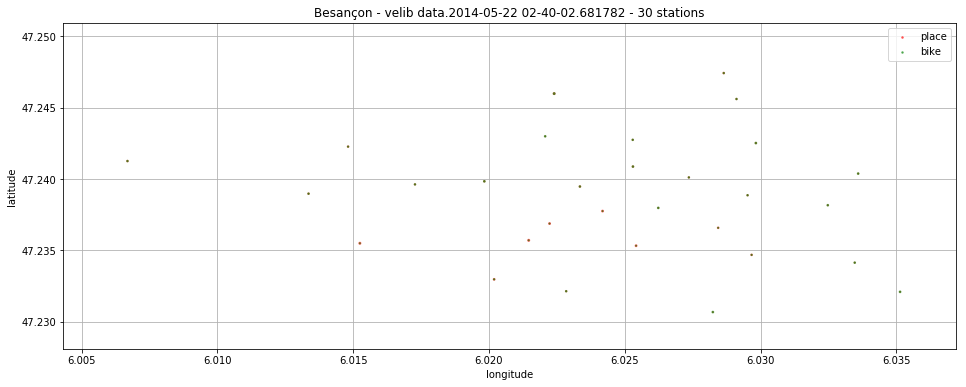

In [18]:
# première image des données
dt = df["file"][0]
subset = df [ df["file"] == dt 
            ]
fig,ax,plt = DataCollectJCDecaux.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                .replace(".txt","").replace("_", " "), len(subset)));

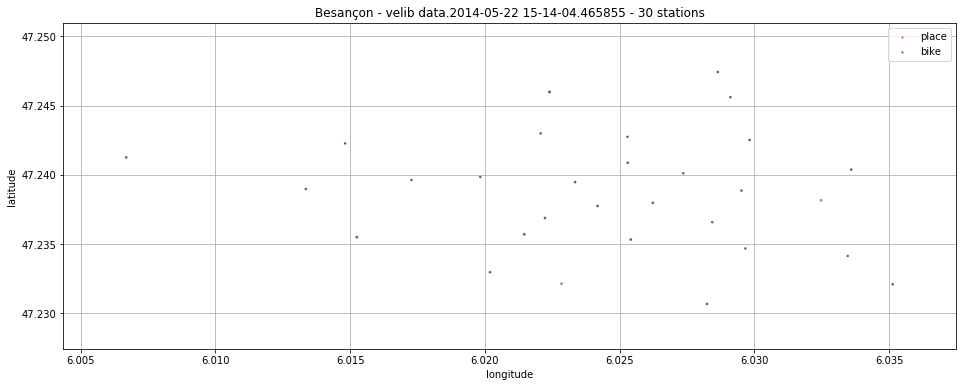

In [19]:
# dernière image
dt = df["file"][len(df)-1]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataCollectJCDecaux.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                            .replace(".txt","").replace("_", " "), len(subset)));

Vous trouverez un exemple d'utilisation de ces données ici [Coding Party 22 mai 2014 : inférer des trajectoires de vélos](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/coding_party_1.html) et là [Déterminer la vitesse moyenne des vélib](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/expose_velib.html).

In [20]:
DataCollectJCDecaux.draw(subset, use_folium=True, size=0.1)